CRISP DM: Data Understanding
- funded_amount ... mit Ablauf der "Crowding"zeit erhaltener Betrag/ ausgezahlter Betrag in USD
- loan_amount ... Zielbetrag (Betrag dem man für das Projekt erreichen wollte) in USD
- activity ... Unterkategory zu dem das Ziel des Crowdprojektes thematisch gehört
- sector ... Oberkategory in den das Crowdprojektes Thema fällt
- use ... Kurzbeschreibung wofür das Geld verwendet werden soll
- country_code ... Ländercode nach ISO Norm
- country ... Ländername nach ISO Norm
- region ... Region
- currency ... Währung in den der funded_amount dann ausgezahlt wurde
- term in months ... Dauer über die der Kredit ausgezahlt werden soll
- lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
- borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdprojekt initiiert haben       
- repayment interval ... vertraglich vereinbarte Rückzahlungsmodalitäten/-rhythmus

In [1]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_pickle('data_prepared.pkl')
df.head()

,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,borrowers_female,borrowers_male
0,300.0,300.0,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,12.0,12,irregular,1,0
1,575.0,575.0,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,11.0,14,irregular,2,0
2,150.0,150.0,Transportation,Transportation,IN,India,Maynaguri,INR,43.0,6,bullet,1,0
3,200.0,200.0,Embroidery,Arts,PK,Pakistan,Lahore,PKR,11.0,8,irregular,1,0
4,400.0,400.0,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,monthly,1,0


In [3]:
df_avg_funded = df.groupby(by=['repayment_interval'], as_index=False).agg(avg_funded_amount=('funded_amount', 'mean'))
df_avg_funded

#Gruppieren nach Rückzahlunsintervall und aggregieren geförderter Betrag, um den Mittelwerte zu ermitteln.

,repayment_interval,avg_funded_amount
0,bullet,761.542610
1,irregular,685.431772
2,monthly,910.725061
3,weekly,234.071906


In [4]:
df_sector = df.groupby(by='sector', as_index=False).agg(anzahl_activity=('activity','count'))
df_sector
# In dieser tabelle sehen wir die Anzahl der Aktivitäten für jede Sektor.

,sector,anzahl_activity
0,Agriculture,174624
1,Arts,11938
2,Clothing,32554
3,Construction,6263
4,Education,30128
5,Entertainment,829
6,Food,135359
7,Health,9190
8,Housing,30155
9,Manufacturing,6204


In [5]:
df_funded_loan = df.groupby(by='country',as_index=False).agg(avg_funded_amount = ('funded_amount','mean'), avg_loan_amount = ('loan_amount','mean'))
df_funded_loan

,country,avg_funded_amount,avg_loan_amount
0,Afghanistan,7000.000000,7000.000000
1,Albania,1287.487073,1378.748707
2,Armenia,1296.135126,1496.474099
3,Azerbaijan,1388.890319,1486.277034
4,Belize,915.322581,915.322581
...,...,...,...
82,Vietnam,1356.091357,1484.618209
83,Virgin Islands,0.000000,5000.000000
84,Yemen,771.325119,812.775616
85,Zambia,1474.000000,1554.935484


In [6]:
df_anzahl_geschlecht = df.groupby(by='sector').agg(anzahl_female = ('borrowers_female', 'sum'), anzahl_male = ('borrowers_male', 'sum'))
df_anzahl_geschlecht

,anzahl_female,anzahl_male
sector,,
Agriculture,259228,110613
Arts,21497,2117
Clothing,80353,8176
Construction,6158,4367
Education,22056,12151
Entertainment,550,465
Food,285541,39542
Health,10979,4053
Housing,27536,9346


In [8]:
# Mehrere Frauen haben Projekte als Männer, besonders in 'sector' Food.
#Frauen sind meistens Arbeitslos und sie sind gut in Nahrungsmittelindustrie.

In [7]:
df_kosten = df.groupby(by=['repayment_interval','sector'], as_index=False).agg(avg_funded_amount=('funded_amount','mean'))
df_kosten.sort_values(by=['repayment_interval', 'avg_funded_amount'], ascending=(True, False))

,repayment_interval,sector,avg_funded_amount
14,bullet,Wholesale,1531.696429
7,bullet,Health,1263.405797
1,bullet,Arts,1106.984182
0,bullet,Agriculture,809.093423
9,bullet,Manufacturing,765.909091
6,bullet,Food,709.542876
12,bullet,Services,702.110055
11,bullet,Retail,670.972222
4,bullet,Education,657.604360
8,bullet,Housing,612.514286


In [9]:
# In dieser Tabelle sehen wir das;  dass 1. der Sektor 'Wholesale' in 'bullet' maximal finanziert,
#                                        2. der Sektor 'Wholesale' in 'irregular' maximal finanziert,
#                                        3. der Sektor 'Entertainment' in 'monthly' maximal finanziert,
#                                        4. der Sektor 'Health' in 'weekly' maximal finanziert.

In [10]:
df_country = df.groupby(by=['country'], as_index=False).agg(anzahl_frauen=('borrowers_female','sum'), anzahl_männer=('borrowers_male','sum'))
df_country

,country,anzahl_frauen,anzahl_männer
0,Afghanistan,2,0
1,Albania,1034,900
2,Armenia,5385,3244
3,Azerbaijan,740,1207
4,Belize,13,111
...,...,...,...
82,Vietnam,25732,1587
83,Virgin Islands,2,0
84,Yemen,4333,1137
85,Zambia,465,517


In [11]:
df_region_geschlecht =df.groupby(by=['country','region'], as_index=False).agg(anzahl_frauen=('borrowers_female','sum'), anzahl_männer=('borrowers_male','sum'))
df_region_geschlecht

,country,region,anzahl_frauen,anzahl_männer
0,Afghanistan,Kandahar City,2,0
1,Albania,Cerrik,0,1
2,Albania,Elbasan,105,138
3,Albania,Korce,586,482
4,Albania,Lac,75,47
...,...,...,...,...
12749,Zimbabwe,Shurugwi,120,0
12750,Zimbabwe,Umguza,54,0
12751,Zimbabwe,Umzingwane,43,0
12752,Zimbabwe,mwenezi,106,0


# Dashboard

In [12]:
# benötigte Bibliotheken importieren

## für die Daten

import pandas as pd 

## für die Visualisierung

import plotly.express as px 

## für die Dash-App

from jupyter_dash import JupyterDash
from dash import dcc
#import dash_core_components as dcc 

from dash import html
#import dash_html_components as html 

from dash.dependencies import Input, Output
import plotly.graph_objects as go

In [13]:

fig_geschlecht = go.Figure()
fig_geschlecht.add_trace(go.Bar(x=df_anzahl_geschlecht.index,
                     y=df_anzahl_geschlecht["anzahl_female"],
                     name="anzahl_female"))
fig_geschlecht.add_trace(go.Bar(x=df_anzahl_geschlecht.index,
                     y=df_anzahl_geschlecht["anzahl_male"],
                     name="anzahl_male"))

fig_geschlecht.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_anzahl_geschlecht.index
    )
)



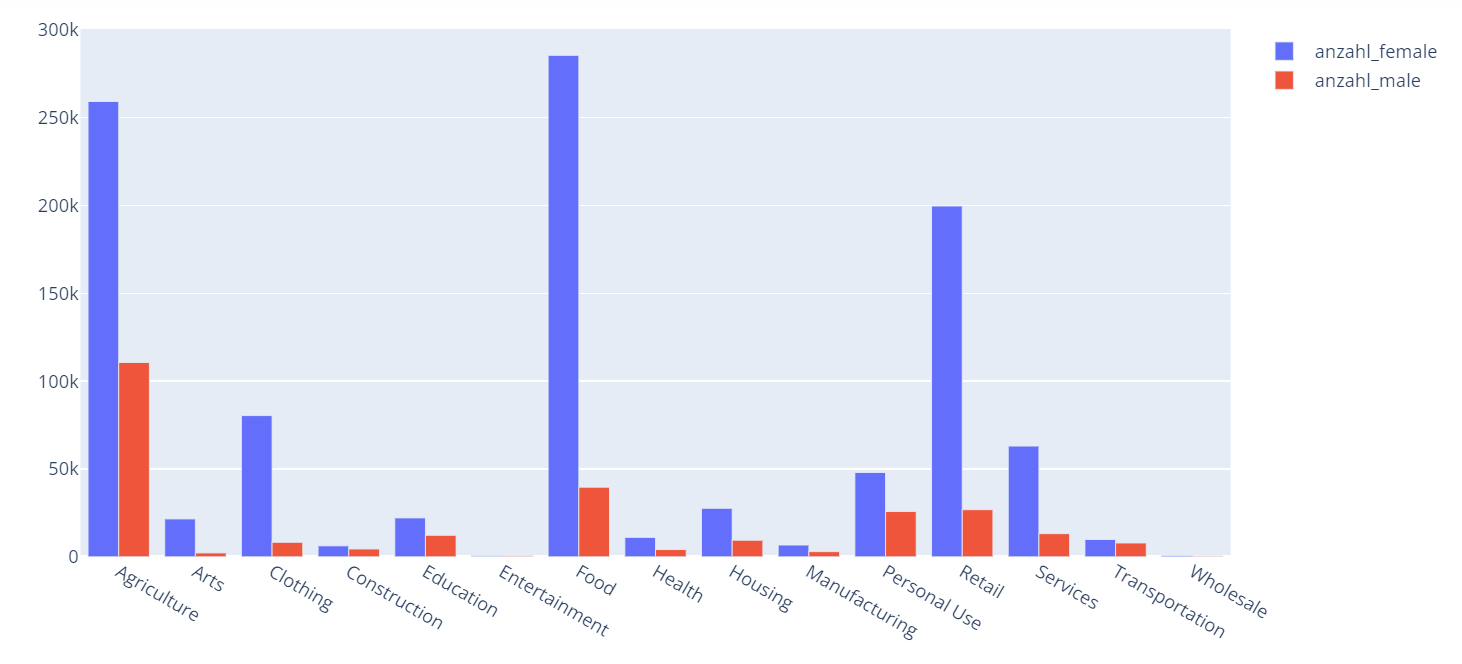

In [15]:

# 1. App erstellen

my_app = JupyterDash(__name__)


# 2. Layout festlegen

my_app.layout = html.Div([
                             # Überschrift der App
    
                            html.H1(children="Finanzanalyze beim Rückzalungstyp ",
                                    style={"textAlign": "center"}),
    
                            # Dropdown
    
                            dcc.Dropdown(id="repayment_interval",
                                         options=sorted(df.loc[:,"repayment_interval"].unique()),
                                         style={"width":250},
                                         placeholder="Rückzahlungsintervall: "
                            
                                        ),
    
                            dcc.Graph(
                                      id="kiva_graph",
                                      figure={}
                                        ),
                           
                        html.H1(children="Geschlechtanalyze beim Land ",
                                    style={"textAlign": "center"}),
    
                            # Dropdown
    
                            dcc.Dropdown(id="geschlecht_beim_land",
                                         options=sorted(df.loc[:,"country"].unique()),
                                         style={"width":250},
                                         placeholder="Land: "
                            
                                        ),
    
    
                            dcc.Graph(
                                      id="kiva_graph2",
                                      figure=fig_geschlecht
                                        ),
                            html.Br(),
                        html.H1(children="Projektanzahl beim Land ",
                                    style={"textAlign": "center"}),
                            
    
                            # Dropdown
    
                            dcc.Dropdown(id="map",
                                         options=sorted(df.loc[:,"country"].unique()),
                                         style={"width":250},
                                         placeholder= sorted(df.loc[:,"country"].unique())
                            
                                        ),
    
                            dcc.Graph(
                                      id="kiva_graph3",
                                      figure={}
                                        )
                           

                            ])



# 3.1 Aufbau des Callbacks: Verbindung mit Elementen aus dem Layout
@my_app.callback(
                     Output(component_id="kiva_graph", component_property="figure"),
                     Output(component_id="kiva_graph2", component_property="figure"),
                     Output(component_id="kiva_graph3", component_property="figure"),
                    
                     Input(component_id="repayment_interval", component_property="value"),
                     Input(component_id="geschlecht_beim_land", component_property="value"),
                     Input(component_id="map", component_property="value")
                    )


# 3.2 Erstellen der Update-Funktion: ändert sich der Input, ändert sich der Output

def update_type(type_selected,country_selected,map_):
    
    # Daten selektieren: repayment_interval, sector --> siehe Testing area
    
    df_cause_selected = df_kosten.loc[(df_kosten.loc[:,"repayment_interval"]==type_selected)]
    
    # Daten aggregieren 
    
    df_group = df_cause_selected
    # Plot erstellen
    
    my_pie = px.pie(data_frame=df_group,
                names='sector',
                values="avg_funded_amount",
                
                template="simple_white"
               
               )
    
    
    df_country = df[df['country']==country_selected].groupby(by='sector').agg(anzahl_female = ('borrowers_female', 'sum'), anzahl_male = ('borrowers_male', 'sum'))
    fig_geschlecht = go.Figure()
    fig_geschlecht.add_trace(go.Bar(x=df_country.index,
                         y=df_country["anzahl_female"],
                         name="anzahl_female"))
    fig_geschlecht.add_trace(go.Bar(x=df_country.index,
                         y=df_country["anzahl_male"],
                         name="anzahl_male"))
    
    fig_geschlecht.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = df_country.index
        )
    )
    
    df_country_map = df.groupby(by="country", as_index=False).agg(func={"country_code":"count"}) 
    fig_map = go.Figure(data=go.Choropleth(
                locations = df_country_map["country"],
                locationmode = "country names",
                z = df_country_map["country_code"],
                colorscale = "sunset",
                autocolorscale=False,
                marker_line_color='darkgray',
                marker_line_width=0.5,
                colorbar_title = "Projektanzahl beim Land",
                        )
                )


    return my_pie, fig_geschlecht, fig_map


# 4. App starten

my_app.run_server(mode='inline', port=8095)

Dash is running on http://127.0.0.1:8095/



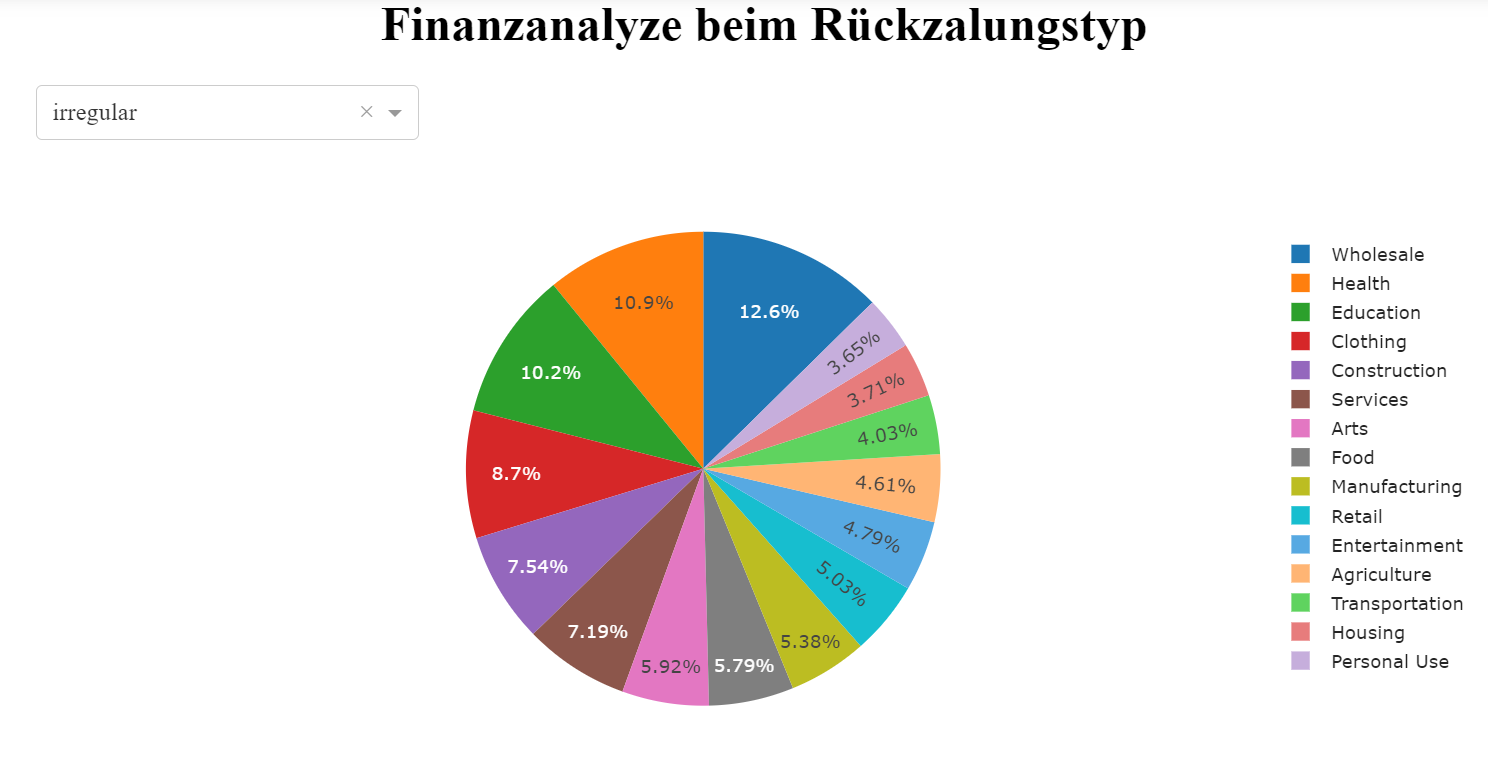

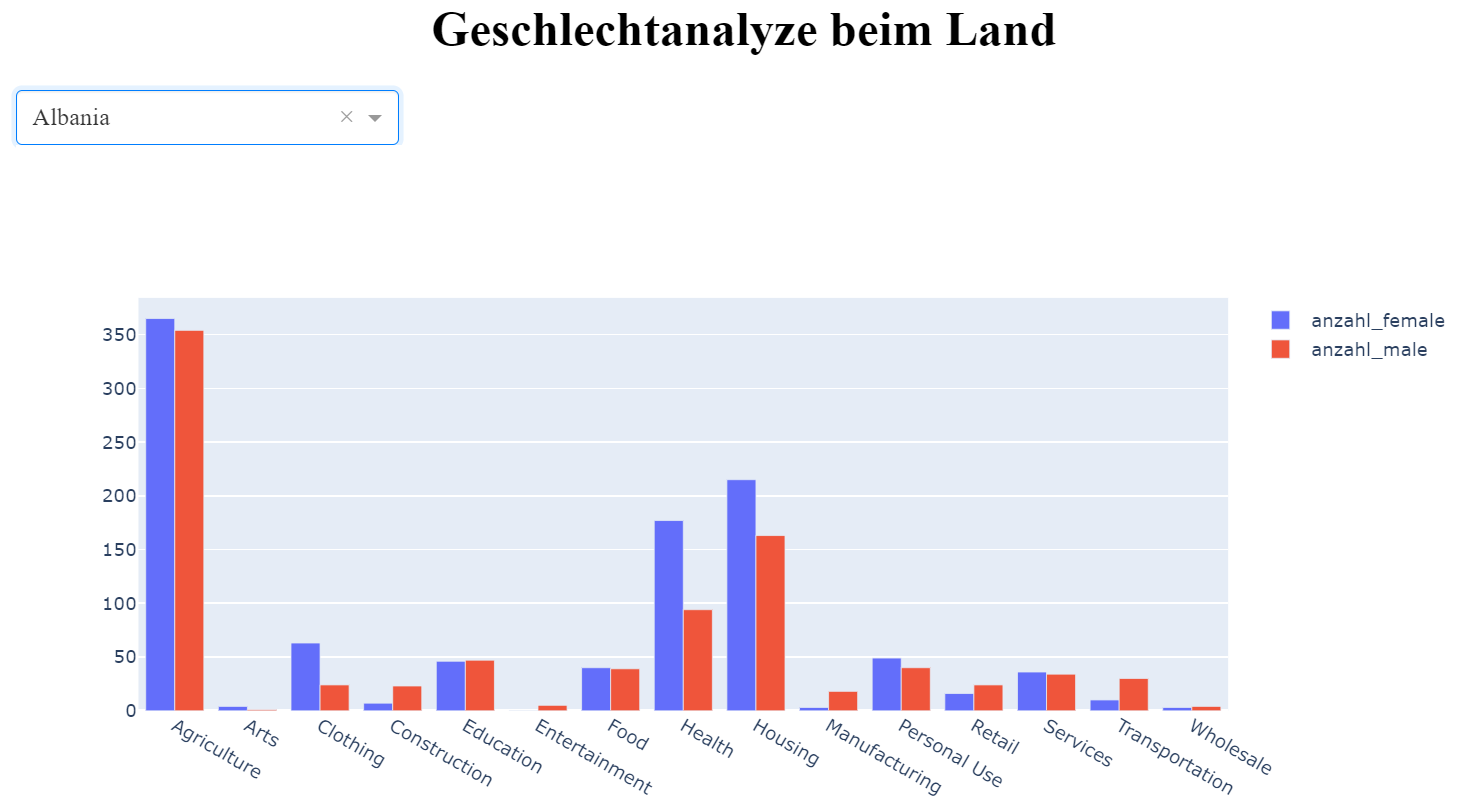

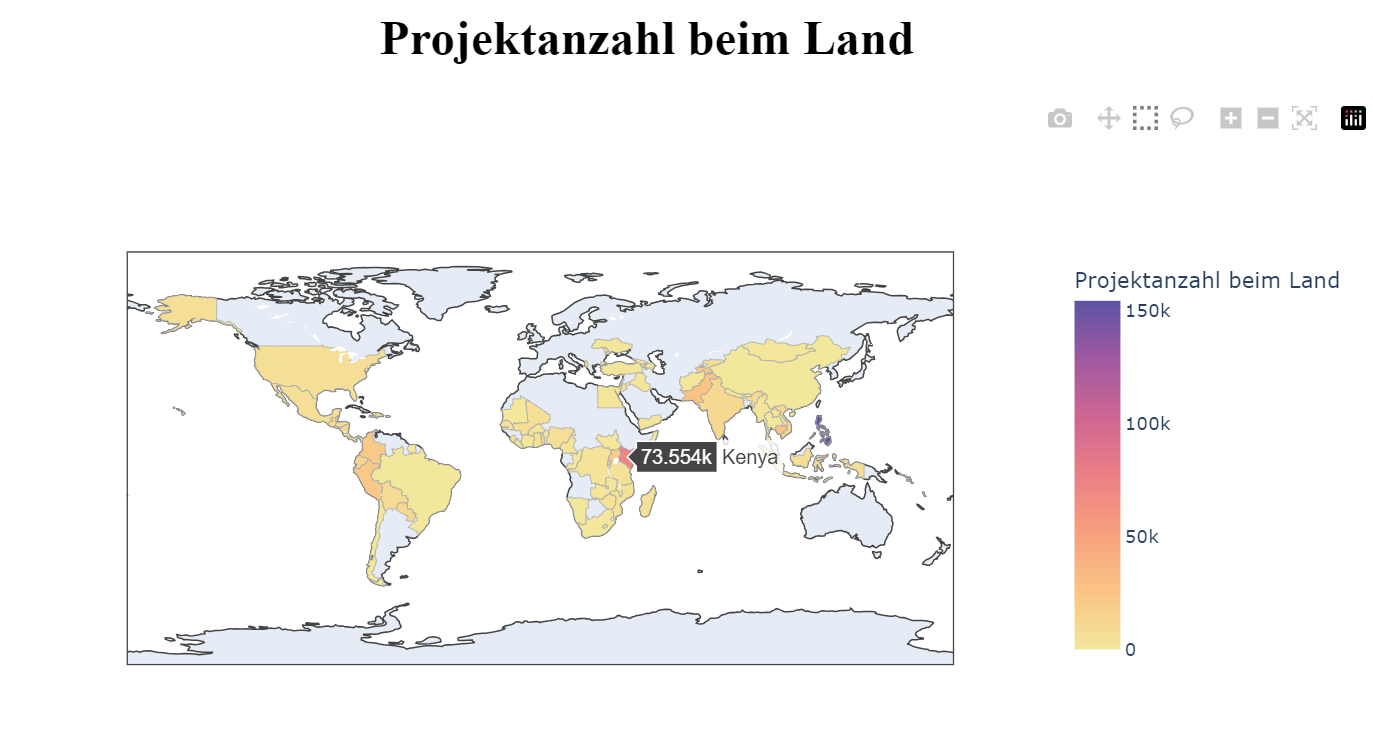

**END**